# Worksheet 4 - Mathematical morphology (TPI.3)

#### Notes:
- The purpose of this worksheet is to implement the concepts learned in the Biomedical Image Processing - Mathematical morphology 
- The resolution of the exercises of this practical work must be sent by email with the name "PIB_GroupNumber_TPI.3"
- The images to be used are available in the curricular unit's moodle - "Worksheet images"

In [3]:
# command to allow the display of image and plots in the notebook
%pylab inline
import skimage.morphology as mf
from scipy import ndimage as nd
from skimage.measure import label, regionprops

Populating the interactive namespace from numpy and matplotlib


**Question 1**: Read and visualize the "BinaryImg.png" image and its processed version "BinaryImg_processed.png". You must view the images side by side (horizontally)

In [4]:
bin_img = imread('BinaryImg.png')
bin_img_processed = imread('BinaryImg_processed.png')

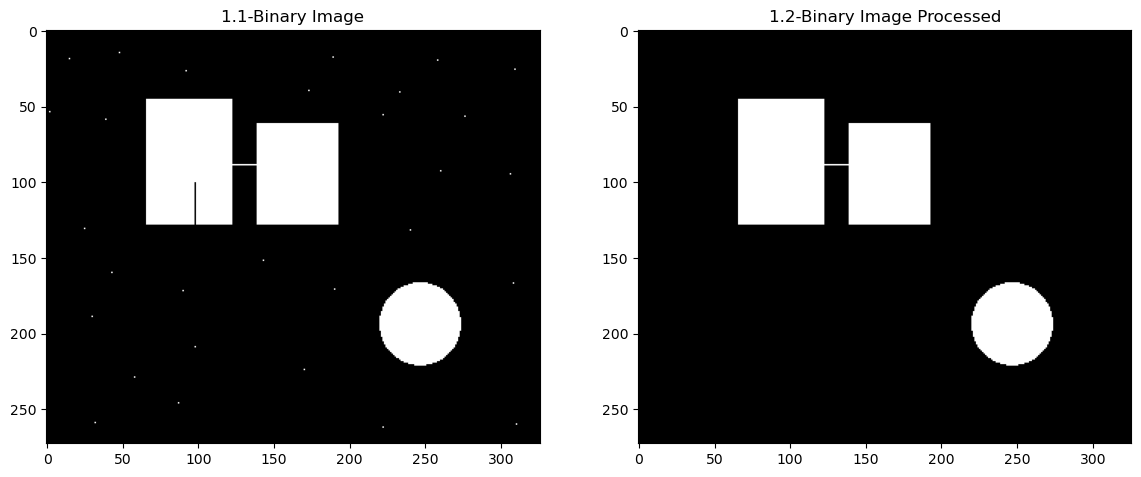

In [5]:
fig, (img1, img2) = matplotlib.pylab.subplots(1,2,figsize=(14,10))

gray()
img1.imshow(bin_img)
img1.title.set_text('1.1-Binary Image')
img2.imshow(bin_img_processed)
img2.title.set_text('1.2-Binary Image Processed')

**Question 2**: Use the concepts of mathematical morphology to obtain the image "BinaryImg_processed.png" from the image ""BinaryImg_processed".

Resultado:  0.0


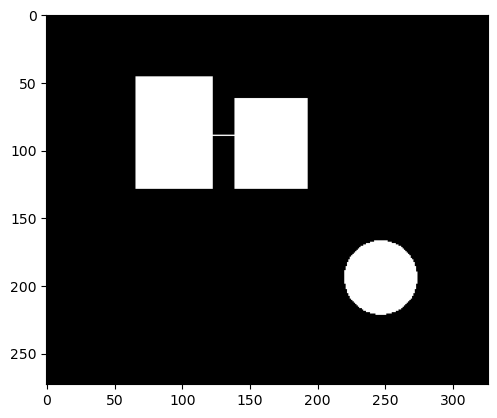

In [8]:
# definição de kernel que permita eliminar o traço preto vertical e mantenha o traço branco horizontal
k=np.array(([0,0,0],[1,1,1],[0,0,0]))

# opening - eliminação de ruído
img1=mf.binary_opening(bin_img, footprint=k)

# closing - eliminação de traço preto
img2=mf.binary_closing(img1, footprint=k)

# imagem final
imshow(img2)

# Confirmação da inexistência de diferenças entre a imagem obtida e a imagem proposta
n = np.subtract(img2,bin_img_processed)
a = sum(n)
print('Resultado: ', a)



**Question 3**: Read and visualize the "head.png" and "head_gaussian_noise.png". You must view the images side by side (horizontally)

In [9]:
head = imread('head.png')
head_gaussian_noise = imread('head_gaussian_noise.png')

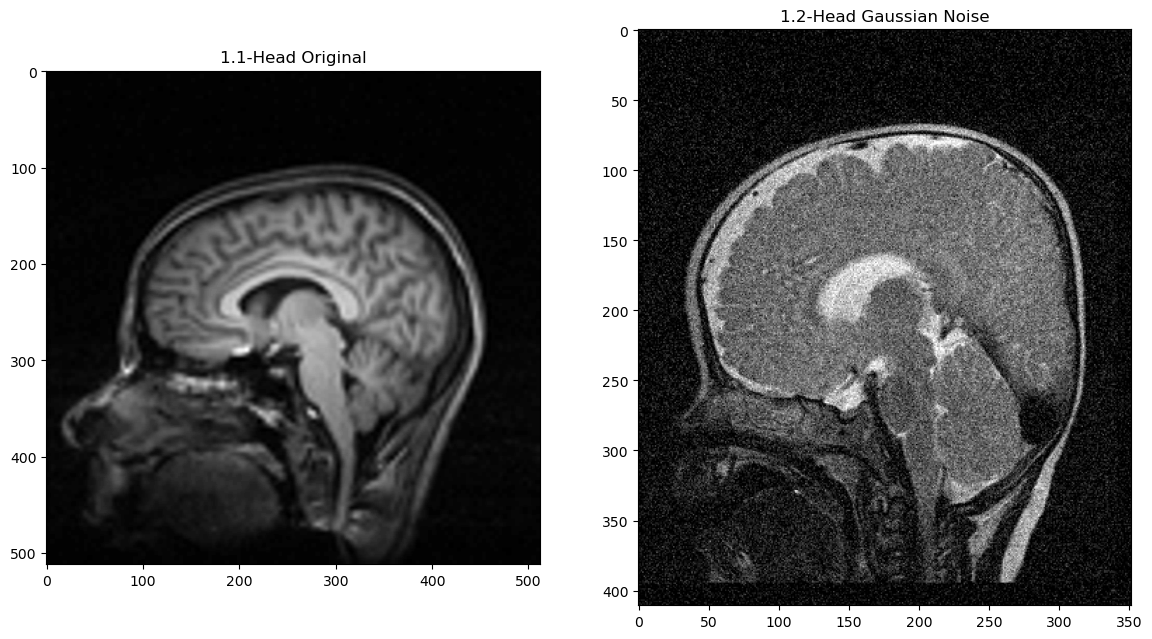

In [10]:
fig, (img1, img2)=matplotlib.pylab.subplots(1,2,figsize=(14,10))

img1.imshow(head)
img1.title.set_text('1.1-Head Original')
img2.imshow(head_gaussian_noise)
img2.title.set_text('1.2-Head Gaussian Noise')

**Question 4**: Smooth the images using mathematical morphology. Analyze the resulting opening and closing images, as well as the final image. Try different kernel sizes for a disk structuring element.

In [11]:
# Utilizou-se o elemento estruturante disco com diferentes tamanhos (1, 2 e 4)
# Fez-se opening e a seguir closing

h_opening_r1 = mf.opening(head,footprint=(mf.disk(1)))
h_closing_r1 = mf.closing(h_opening_r1,footprint=(mf.disk(1)))

h_opening_r2 = mf.opening(head,footprint=(mf.disk(2)))
h_closing_r2 = mf.closing(h_opening_r2,footprint=(mf.disk(2)))


h_opening_r4 = mf.opening(head,footprint=(mf.disk(4)))
h_closing_r4 = mf.closing(h_opening_r4,footprint=(mf.disk(4)))

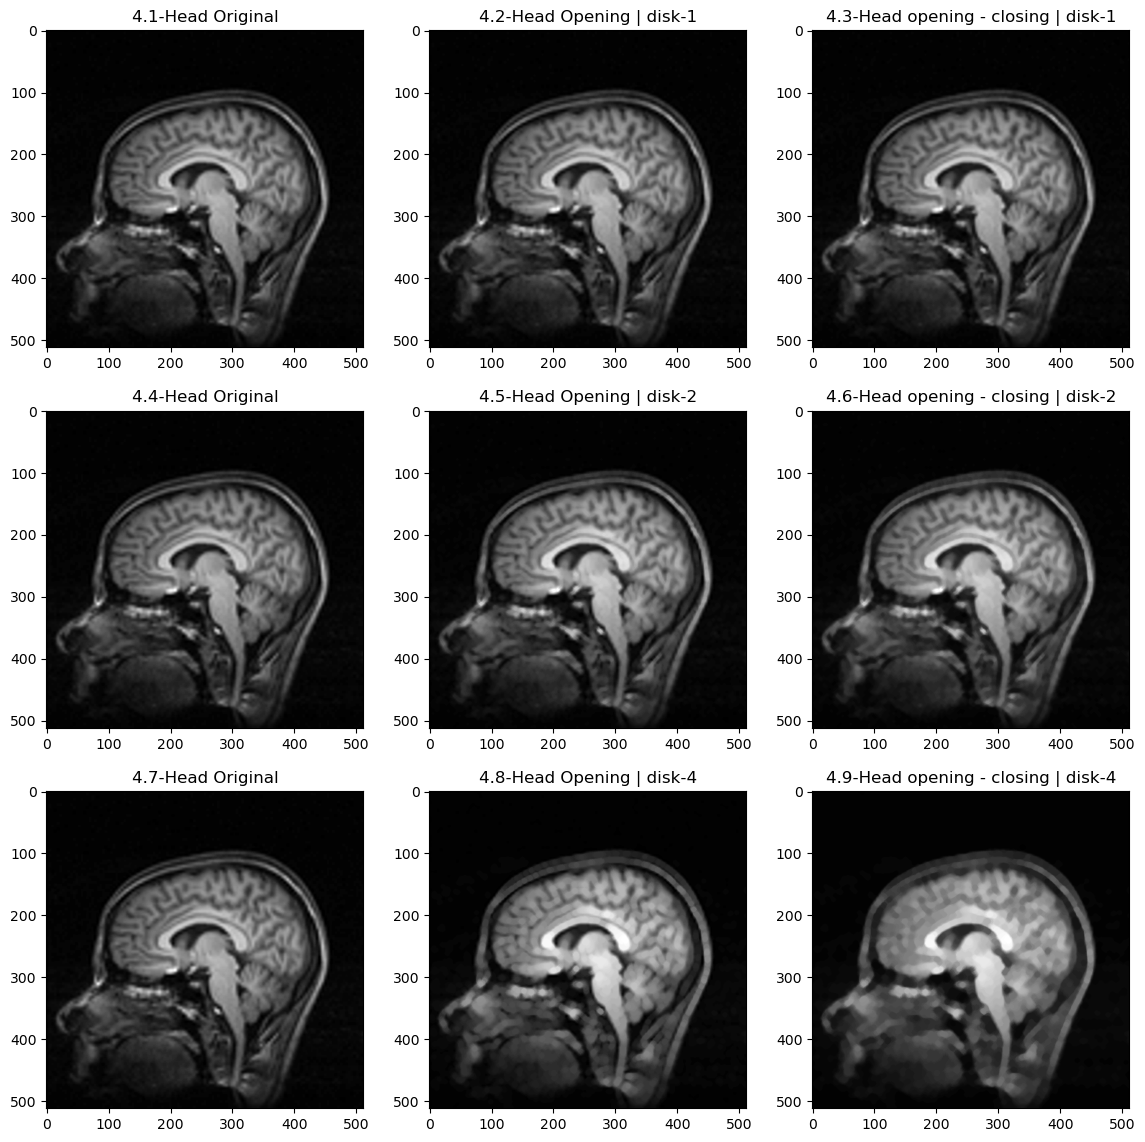

In [12]:
fig, ((img1, img2, img3),(img4, img5,img6),(img7, img8,img9))=matplotlib.pylab.subplots(3,3,figsize=(14,14))

img1.imshow(head)
img1.title.set_text('4.1-Head Original')
img2.imshow(h_opening_r1)
img2.title.set_text('4.2-Head Opening | disk-1')
img3.imshow(h_closing_r1)
img3.title.set_text('4.3-Head opening - closing | disk-1')
img4.imshow(head)
img4.title.set_text('4.4-Head Original')
img5.imshow(h_opening_r2)
img5.title.set_text('4.5-Head Opening | disk-2')
img6.imshow(h_closing_r2)
img6.title.set_text('4.6-Head opening - closing | disk-2')
img7.imshow(head)
img7.title.set_text('4.7-Head Original')
img8.imshow(h_opening_r4)
img8.title.set_text('4.8-Head Opening | disk-4')
img9.imshow(h_closing_r4)
img9.title.set_text('4.9-Head opening - closing | disk-4')

**Conclusão** Verifica-se que o resultado de Abertura e Fecho efetua um 'smoothing' à imagem inicial. A variação do tamanho do elemento estruturante provoca um smoothing mais acentuado, quando maior o elemento estruturante. Na imagem 4.9, com um elemento estruturante disco de tamanho 4, verifica-se que a imagem sofreu um smoothing acentuado e perde definição.

In [13]:
h_opening_r1g=mf.opening(head_gaussian_noise,footprint=(mf.disk(1)))
h_closing_r1fg=mf.closing(h_opening_r1g,footprint=(mf.disk(1)))

h_opening_r2g=mf.opening(head_gaussian_noise,footprint=(mf.disk(2)))
h_closing_r2fg=mf.closing(h_opening_r2g,footprint=(mf.disk(2)))

h_opening_r4g=mf.opening(head_gaussian_noise,footprint=(mf.disk(4)))
h_closing_r4fg=mf.closing(h_opening_r4g,footprint=(mf.disk(4)))

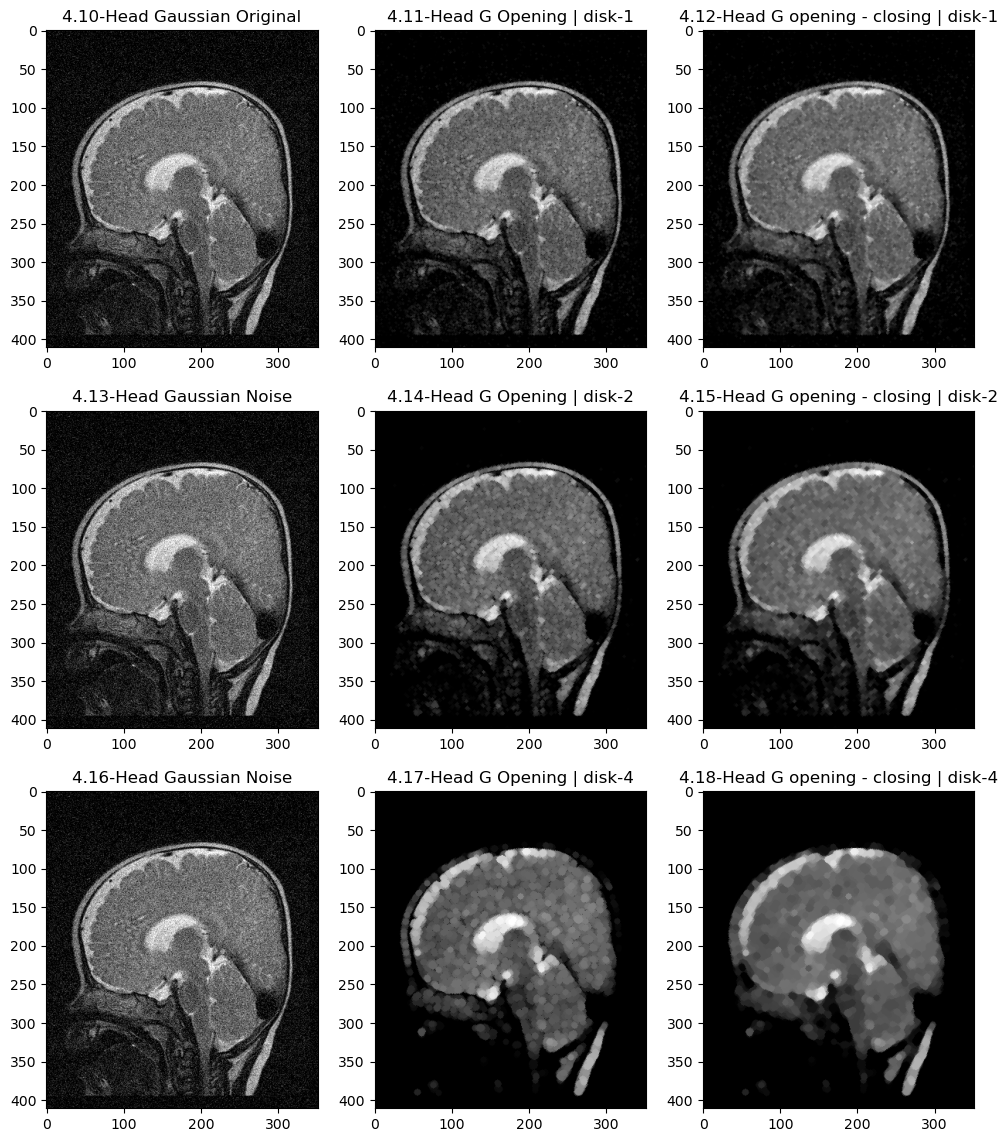

In [14]:
fig, ((img1, img2,img3),(img4, img5,img6),(img7, img8,img9))=matplotlib.pylab.subplots(3,3,figsize=(12,14))

img1.imshow(head_gaussian_noise)
img1.title.set_text('4.10-Head Gaussian Original')
img2.imshow(h_opening_r1g)
img2.title.set_text('4.11-Head G Opening | disk-1')
img3.imshow(h_closing_r1fg)
img3.title.set_text('4.12-Head G opening - closing | disk-1')
img4.imshow(head_gaussian_noise)
img4.title.set_text('4.13-Head Gaussian Noise')
img5.imshow(h_opening_r2g)
img5.title.set_text('4.14-Head G Opening | disk-2')
img6.imshow(h_closing_r2fg)
img6.title.set_text('4.15-Head G opening - closing | disk-2')
img7.imshow(head_gaussian_noise)
img7.title.set_text('4.16-Head Gaussian Noise')
img8.imshow(h_opening_r4g)
img8.title.set_text('4.17-Head G Opening | disk-4')
img9.imshow(h_closing_r4fg)
img9.title.set_text('4.18-Head G opening - closing | disk-4')

**Conclusão** Como a realização de um smoothing morfológico com Abertura e Fecho, verifica-se que há uma diminuição de ruído em relação à imagem inicial. A utilização de um elemento estruturante progressivamente maior traduziu-se numa suavização da imagem mais intensa. No caso de um elemento estruturante disco de tamanho 4, levou mesmo à perda de nitidez da imagem.

**Question 5**: Detect the image contours using mathematical morphology. Apply the edge detection method to the original image and the resulting smoothed image in question 4. Analyze the results.

In [15]:
def edge_detection(img):
    dil=mf.dilation(img, footprint=mf.disk(1))
    ers=mf.erosion(img, footprint=mf.disk(1))
    imT=np.subtract(dil,ers)
    
    return imT

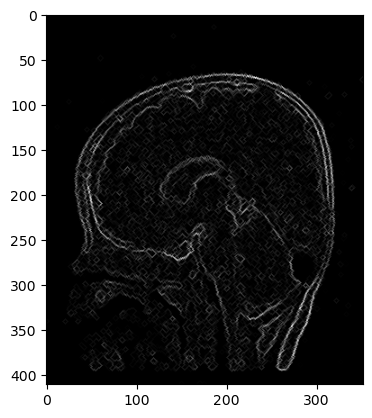

In [16]:
imshow(edge_detection(h_closing_r2fg))

**Conclusão** Através da aplicação de uma dilatação e erosão à imagem inicial é possível utilizar a diferença entre estes dois resultados para obter um contorno na imagem, ficando no final evidenciado (branco) a zona onde ocorreu a dilatação e erosão. Isto acontece porque a dilatação e erosão são aplicadas em zonas onde há uma diferença da intensidade na área do elemento estruturante, ficando inalteradas as restantes zonas.

**Question 6**: Read and visualize the "kidney.png" and its mask "kidney_segmented.png". You must view the images side by side (horizontally)

In [17]:
kidney=imread('kidney.png')
k_segmented=imread('kidney_segmented.png')

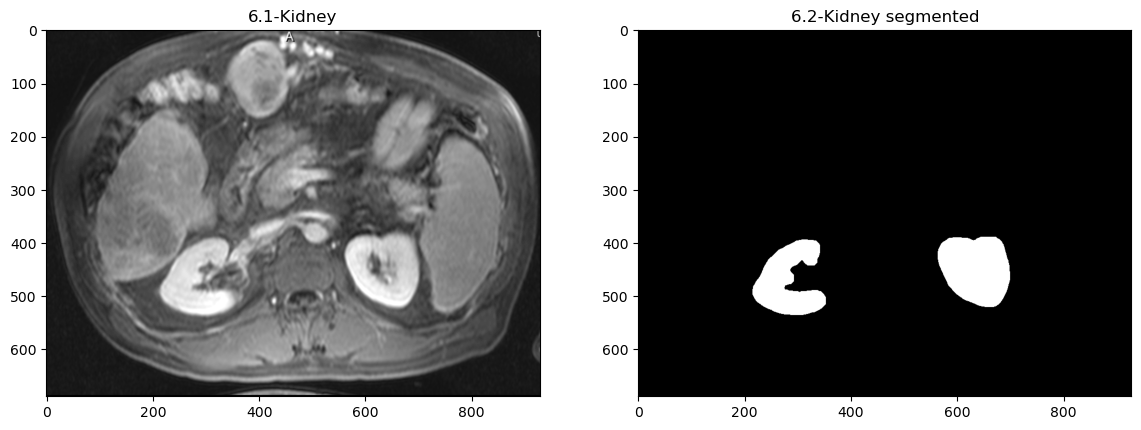

In [18]:
fig, (img1, img2)=matplotlib.pylab.subplots(1,2,figsize=(14,10))

gray()
img1.imshow(kidney)
img1.title.set_text('6.1-Kidney')
img2.imshow(k_segmented)
img2.title.set_text('6.2-Kidney segmented')

**Question 7**: Construct a pipeline to segment the kidneys in the image. 
- You should start by binarizing the image using an appropriate threshold 
- You should choose the threshold according to the intensity of the image and kidneys. To analyze the intensities, you need to compute the histogram of the image and kidney 
- The final step is to use mathematical morphology to obtain a kidney mask similar to the "kidney_segmented.png" image. 

In [19]:
#1- utilizar o histograma com a mascara dos rins para verificar os valores a considerar.
def histogram(img,img_mask):
    
    #get image l and c info
    (l,c)=img.shape
    
    #Create array for histogram   
    h=np.zeros(256)
    
    #Iterate de image
    for i in range(l):
        for j in range(c):
            #see if it is in area of interest (white(255))
            if img_mask[i,j]==True:
                #get index
                value=img[i,j]
                #increment in index
                h[value]=h[value]+1
    
    return h


In [20]:
print(k_segmented.dtype)

#-Convert images to uint8
kidney8=np.round(kidney*255).astype(np.uint8)
k_segmented8=np.round(k_segmented*255).astype(np.bool_)
print(k_segmented8.dtype)

#Histogram using proposed mask
h=histogram(kidney8, k_segmented8)


float32
bool


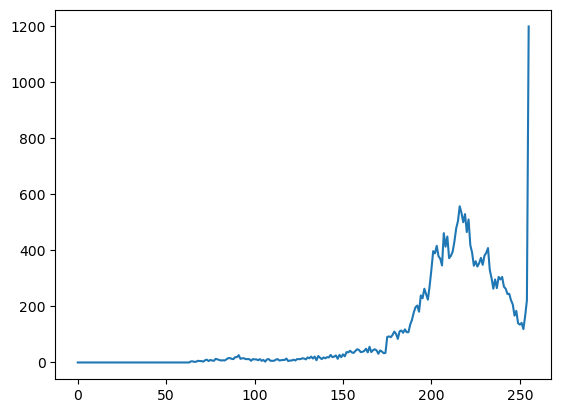

In [21]:
im0=plot(histogram(kidney8, k_segmented8))


**A -** Com base na análise do histograma, verifica-se há uma predominância de intensidades acima do valor 170. Decidiu-se utilizar este valor como treshold inicial e aumentar progressivamente, procurando o melhor resultado final

In [22]:
#convert image to bin, using 'tr' treshold value
def img_to_bin(img, tr):
    (w,h)=img.shape
    
    imgBin=np.full((w,h),0)
    for i in range(w):
        for j in range(h):
            if img[i,j]>tr:
                imgBin[i,j]=1
    
    return imgBin

In [23]:
img_170=img_to_bin(kidney8,170)
img_180=img_to_bin(kidney8,180)
img_195=img_to_bin(kidney8,195)
img_205=img_to_bin(kidney8,205)

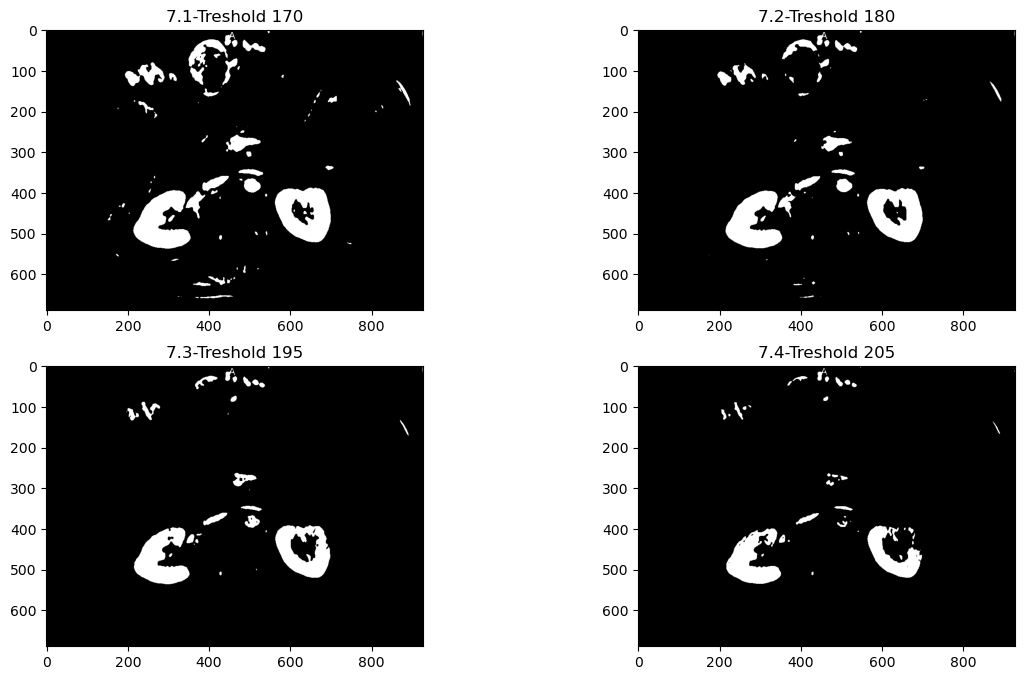

In [24]:
fig, ((img1, img2), (img3,img4))=matplotlib.pylab.subplots(2,2,figsize=(14,8))

img1.imshow(img_170)
img1.title.set_text('7.1-Treshold 170')
img2.imshow(img_180)
img2.title.set_text('7.2-Treshold 180')
img3.imshow(img_195)
img3.title.set_text('7.3-Treshold 195')
img4.imshow(img_205)
img4.title.set_text('7.4-Treshold 205')

**B -** Pelas imagens obtidas entendeu-se que a imagem 7.3 com o treshold 195 seria a que estava mais próxima do objetivo, sendo possível realizar operações de morfologia matemática para aproximar a imagem do resultado esperado.

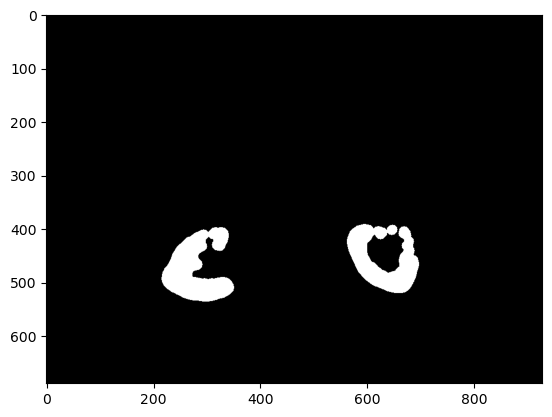

In [25]:
#Opening with large structuring element to eliminate small white dots in the upper side
a1=mf.opening((img_195), footprint=mf.disk(9))
imshow(a1)

**C -** Efetuou-se uma Abertura com elemento estruturante  de valor 9 para eliminar os pontos na parte superior da imagem.

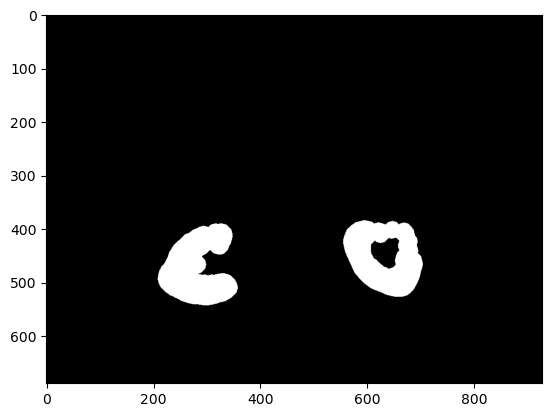

In [26]:
#Dilation to close de right kidney
a=mf.binary_dilation((a1), footprint=mf.disk(7))
imshow(a)

**D -** Efetuou-se uma dilatação para fechar a zona correspondete ao rim à direita Após várias tentativas optou-se pelo elemento estruturante de valor 7,uma vez que era o valor que permitia uma imagem mais aproximada à imagem final.

In [27]:
#fill black holes inside right kidney
b=nd.binary_fill_holes(a).astype(int)

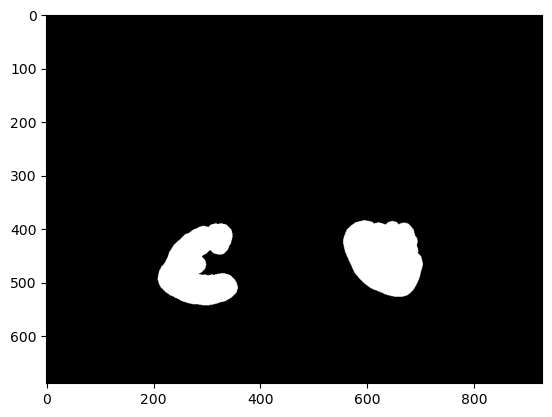

In [28]:
imshow(b)

**E -** Preenchimento da zona preta no rim à direita.

In [47]:
#compare with mask

dif=np.sum(k_segmented!=b)
print(dif)

25937


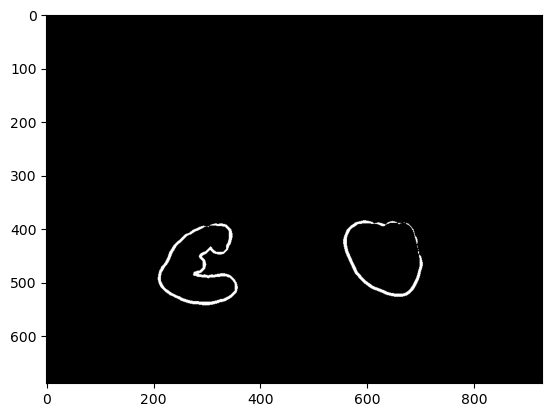

In [30]:
imshow(k_segmented!=b)

**F -** Compação entre a imagem obtida e o objetivo. A diferença inicial traduziu-se numa diferença de 5227 pixeis. Optou-se por melhorar este resultado através do método de erosão, de forma a reduzir a área da imagem obtida

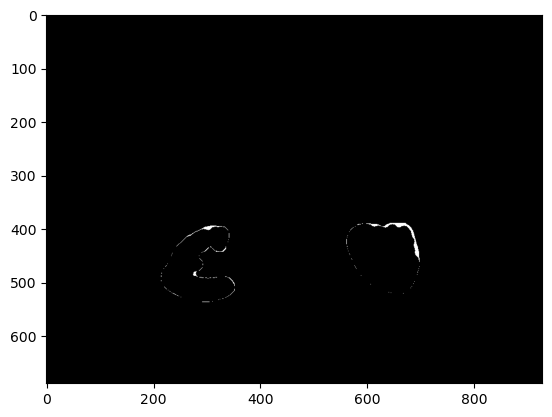

In [31]:
#Erosion to achieve a smaller area
final1=mf.binary_erosion((b), footprint=mf.disk(6))
imshow(k_segmented!=final1)

In [32]:
dif=np.sum(k_segmented!=final1)
print(dif)

1141


**Conclusão** Foram efetuados vários testes com erosão / dilatação da imagem obtida para aproximação do objectivo, no entanto, estes passos resultaram no menor valor de diferença entre a imagem trabalhada e a imagem alvo que se fixou em 1141 píxeis

**EXTRA** Pré-processar a imagem na tentativa de obter melhor resultado final

In [33]:
#equalização
def histogramEqualization(img,imgMask):
    h = histogram(img,imgMask) # histogram
    H = zeros(256) # cumulative histogram
    
    # cumulative histogram building
    for a in range(h.size):
        H[a] = sum(h[0:a])
    
    (l,c) = img.shape
    imgT = np.zeros((l,c),dtype='uint8') # new image
    
    tot_pixel_interest = np.count_nonzero(imgMask==1) #Mask
    
    for i in range(l):
        for j in range(c):
            if imgMask[i,j] == 1:
                g=img[i,j]
                #seting new intensity
                imgT[i,j] = round(255/tot_pixel_interest*H[g])
    return imgT

In [34]:
#Create a ones Mask to histogram
(l,c)=kidney.shape
onesMask=np.ones((l,c))

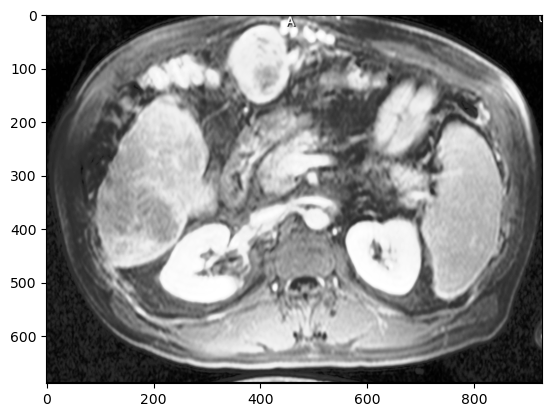

In [35]:
#Equalize image
img_equalized=histogramEqualization(kidney8,onesMask)
imshow(img_equalized)

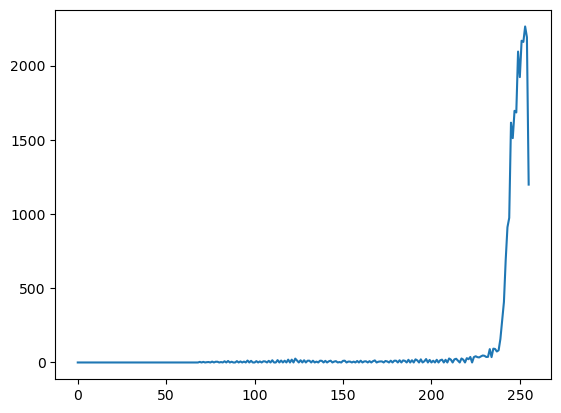

In [36]:
#histogram of equalized image
plot(histogram(img_equalized,k_segmented))

In [37]:
img_185=img_to_bin(kidney8,175)

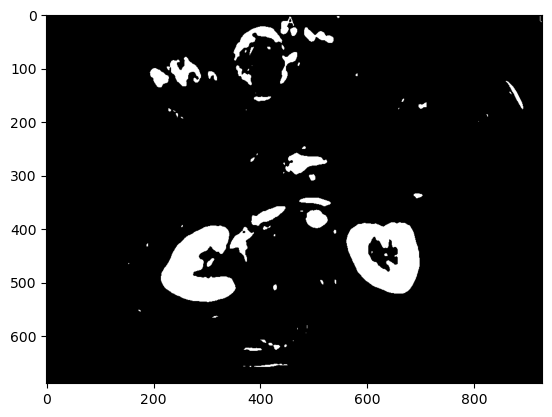

In [38]:
imshow(img_185)

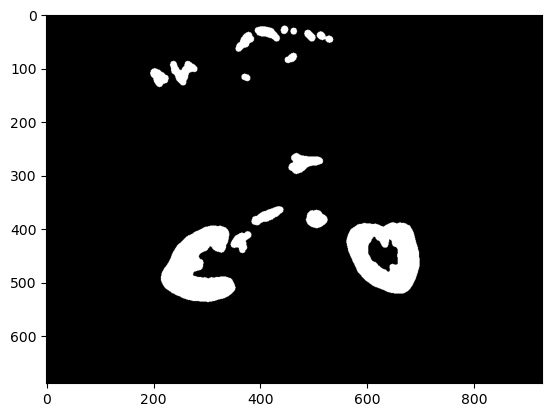

In [39]:
#Opening with struturing element 6
img_200_op=mf.opening((img_185), footprint=mf.disk(6))
imshow(img_200_op)

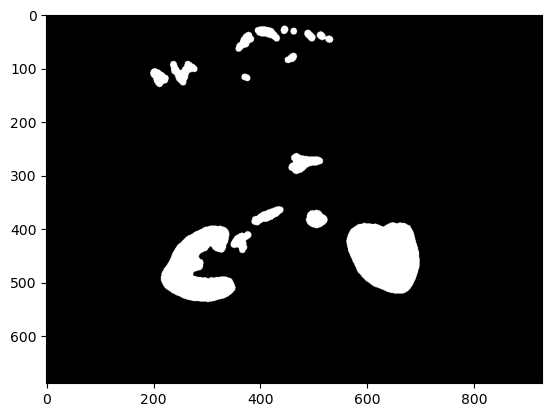

In [40]:
#Fill holes
final2=nd.binary_fill_holes(img_200_op).astype(int)
imshow(final2)

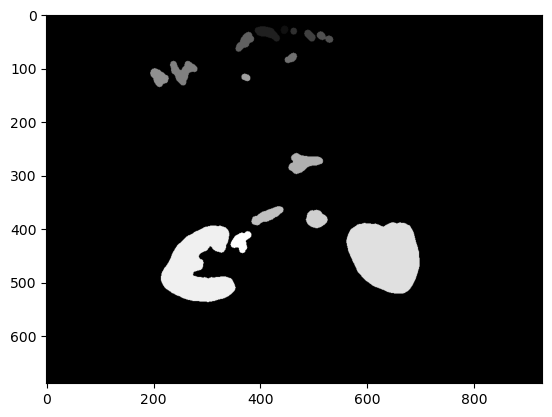

In [41]:
#labeling and regions
label_img = label(final2)
regions = regionprops(label_img)
imshow(label_img)

In [42]:
#area distribution
for props in regions:  
    print(props.area)

176.0
788.0
126.0
307.0
363.0
691.0
300.0
1255.0
766.0
180.0
1476.0
1071.0
1024.0
14239.0
11639.0
921.0


In [43]:
#order by size
ordered = sorted(regions, key=lambda r: r.area,reverse=True,)
for props in ordered:
    print(props.area)

14239.0
11639.0
1476.0
1255.0
1071.0
1024.0
921.0
788.0
766.0
691.0
363.0
307.0
300.0
180.0
176.0
126.0


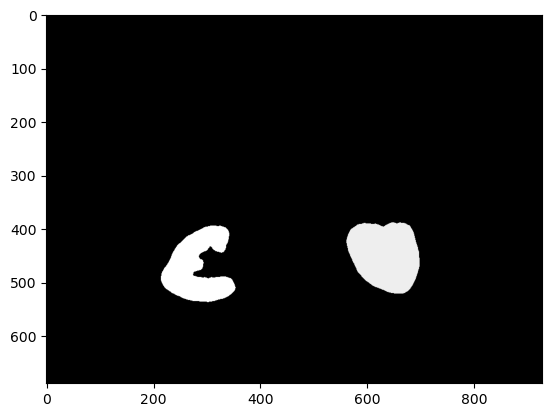

In [44]:
#remove regions with size under 10984 - second biggest in the beggining
b = mf.remove_small_objects(label_img,10984)
imshow(b)

155


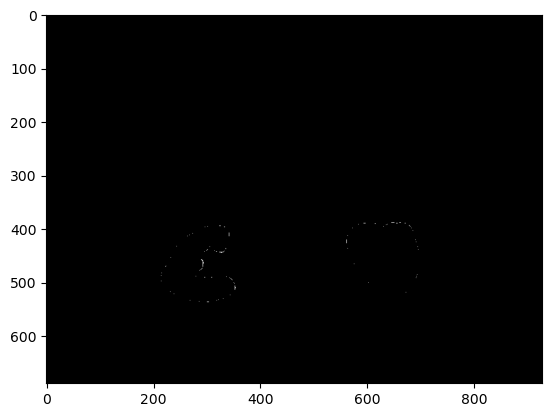

In [46]:
#convert to binary
c= np.round(b*255).astype(np.bool_)

#calculate diferences
dif=np.sum(k_segmented!=c)
imshow(k_segmented!=c)
print(dif)

**Conclusão** A nova abordagem iniciou-se pela equalização da imagem.<br>
Segundo o histograma da imagem equalizada, verifica-se que a área de interesse é preenchida por intensidades acima dos 230. Apesar disso, o valor de threshold que apresentou melhores resultados foi 175, embora tenham sido testados valores entre 230 e 175. <br>
De seguida transformou-se a imagem em imagem binária e efetuou-se um opening com elemento estruturante de tamanho 6.<br>Preencheram-se também os espaços pretos dentro do espaço branco maior.
Através de 'labeling' e 'regions' e posterior remoção das regiões com tamanho abaixo do segundo maior tamanho (10984), permanecem as 2 regiões maiores. O valor escolhido foi o primeiro valor obtido (-1) da segunda maior região inicial.
O melhor valor obtido foi 155.
Ainda se tentaram efetuar operações de erosão e dilatação mas sem melhores resultados.